In [ ]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

### Imports

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy

### Reading data

In [ ]:
data = pd.read_excel('Pubmed5k.xlsx')
data.head()

,ArticleID,Title,Abstract
0,34153941,Stable Coordination Variability in Overground ...,Coordination variability (CV) is commonly anal...
1,34153942,Weak Hip Strength Increases Dynamic Knee Valgu...,Clinical Scenario: Dynamic knee valgus (DKV) i...
2,34153964,Current and Future Projections of Amyotrophic ...,Various methodologies have been reported to as...
3,34153968,Disparities between Asian and Non-Asian Thromb...,As outcomes for acute ischemic stroke (AIS) va...
4,34153978,Maternal Factors Predicting Loss to Follow-Up ...,Because hearing loss in children can result in...


In [ ]:
data.isnull().sum()

ArticleID    0
Title        0
Abstract     0
dtype: int64

In [ ]:
#nltk.download('wordnet')
#nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
nlp = spacy.load('en', disable = ['parser', 'ner'])

### Data Preprocessing


*   Firstly we tokenize the data we are working on to make it easier for the model to make sense of.
*   Secondly, we remove stopwords as they have little to no meaning and benefit to our model.


*   We create bigrams and trigrams towards helping the model understand possibile terminologies.
*   We perform lemmatization on the data towards obtaining the root words of the data we have.


*   Finally, we create a bag of words dictionary stating the words we have and their frequencies in the data.







In [ ]:
# before tokenization
data['Abstract'].unique()[:1]

array(['Coordination variability (CV) is commonly analyzed to understand dynamical qualities of human locomotion. The purpose of this study was to develop guidelines for the number of trials required to inform the calculation of a stable mean lower limb CV during overground locomotion. Three-dimensional lower limb kinematics were captured for 10 recreational runners performing 20 trials each of preferred and fixed speed walking and running. Stance phase CV was calculated for 9 segment and joint couplings using a modified vector coding technique. The number of trials required to achieve a CV mean within 10% of 20 strides average was determined for each coupling and individual. The statistical outputs of mode (walking vs running) and speed (preferred vs fixed) were compared when informed by differing numbers of trials. A minimum of 11 trials were required for stable mean stance phase CV. With fewer than 11 trials, CV was underestimated and led to an oversight of significant differences b

In [ ]:
# after tokenization

def tokens(sentences):
  for sentence in sentences:
    yield(simple_preprocess(str(sentence)))

token = list(tokens(data['Abstract']))

print(token[:1])

[['coordination', 'variability', 'cv', 'is', 'commonly', 'analyzed', 'to', 'understand', 'dynamical', 'qualities', 'of', 'human', 'locomotion', 'the', 'purpose', 'of', 'this', 'study', 'was', 'to', 'develop', 'guidelines', 'for', 'the', 'number', 'of', 'trials', 'required', 'to', 'inform', 'the', 'calculation', 'of', 'stable', 'mean', 'lower', 'limb', 'cv', 'during', 'overground', 'locomotion', 'three', 'dimensional', 'lower', 'limb', 'kinematics', 'were', 'captured', 'for', 'recreational', 'runners', 'performing', 'trials', 'each', 'of', 'preferred', 'and', 'fixed', 'speed', 'walking', 'and', 'running', 'stance', 'phase', 'cv', 'was', 'calculated', 'for', 'segment', 'and', 'joint', 'couplings', 'using', 'modified', 'vector', 'coding', 'technique', 'the', 'number', 'of', 'trials', 'required', 'to', 'achieve', 'cv', 'mean', 'within', 'of', 'strides', 'average', 'was', 'determined', 'for', 'each', 'coupling', 'and', 'individual', 'the', 'statistical', 'outputs', 'of', 'mode', 'walking', 

In [ ]:
# removing stopwords

def remove_stopwords(text):
  return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in text]

In [ ]:
# Build the bigram and trigram models

bigram = gensim.models.Phrases(token, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[token], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigram(text):
  return [bigram_mod[doc] for doc in text]


def make_trigram(text):
  return [trigram_mod[bigram_mod[doc]] for doc in text]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# Lemmatization

def lemmatization(text):
    texts_out = []
    for sent in text:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc])
    return texts_out

In [ ]:
# Processing workflow

# Remove Stop Words
t = remove_stopwords(token)

# Form Bigrams
t_bigrams = make_bigram(t)

# Form Trigrams
t_trigrams = make_trigram(t_bigrams)

# Do lemmatization keeping only noun, adj, vb, adv
t_lemmatized = lemmatization(t_trigrams)

# print output
print(t_lemmatized[:1])

[['coordination', 'variability', 'cv', 'commonly', 'analyze', 'understand', 'dynamical', 'quality', 'human', 'locomotion', 'purpose', 'study', 'develop', 'guideline', 'number', 'trial', 'require', 'inform', 'calculation', 'stable', 'mean', 'lower_limb', 'cv', 'overground', 'locomotion', 'three_dimensional', 'lower_limb', 'kinematic', 'capture', 'recreational', 'runner', 'perform', 'trial', 'prefer', 'fix', 'speed', 'walk', 'run', 'stance', 'phase', 'cv', 'calculated', 'segment', 'joint', 'coupling', 'use', 'modify', 'vector', 'coding', 'technique', 'number', 'trial', 'require', 'achieve', 'cv', 'mean', 'within', 'stride', 'average', 'determine', 'couple', 'individual', 'statistical', 'output', 'mode', 'walk', 'vs', 'run', 'speed', 'prefer', 'vs', 'fix', 'compare', 'inform', 'differ', 'number', 'trial', 'minimum', 'trial', 'require', 'stable', 'mean', 'stance', 'phase', 'cv', 'few', 'trial', 'cv', 'underestimate', 'lead', 'oversight', 'significant', 'difference', 'mode', 'speed', 'futur

In [ ]:
# creating bag-of-words

dictionary = corpora.Dictionary(t_lemmatized)
texts = t_lemmatized
corpus = [dictionary.doc2bow(text) for text in texts]

print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 7), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 3), (36, 2), (37, 3), (38, 2), (39, 2), (40, 1), (41, 1), (42, 4), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 2), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 3), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 3), (62, 2), (63, 2), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 8), (71, 1), (72, 1), (73, 3), (74, 1), (75, 2), (76, 2), (77, 2), (78, 1)]]


In [ ]:
# priting words against their frequencies

[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('achieve', 1),
  ('analyze', 1),
  ('approach', 1),
  ('average', 1),
  ('aware', 1),
  ('calculated', 1),
  ('calculation', 1),
  ('capture', 1),
  ('code', 1),
  ('coding', 1),
  ('commonly', 1),
  ('compare', 1),
  ('consequence', 1),
  ('coordination', 1),
  ('couple', 1),
  ('coupling', 1),
  ('cv', 7),
  ('determine', 1),
  ('develop', 1),
  ('differ', 1),
  ('difference', 1),
  ('dynamical', 1),
  ('few', 1),
  ('finding', 1),
  ('fix', 2),
  ('future', 1),
  ('guideline', 1),
  ('healthy', 1),
  ('human', 1),
  ('individual', 1),
  ('inform', 2),
  ('insufficient', 1),
  ('joint', 1),
  ('kinematic', 1),
  ('lead', 1),
  ('locomotion', 3),
  ('lower_limb', 2),
  ('mean', 3),
  ('minimum', 2),
  ('mode', 2),
  ('modify', 1),
  ('notable', 1),
  ('number', 4),
  ('output', 1),
  ('overall', 1),
  ('overground', 2),
  ('oversight', 1),
  ('perform', 1),
  ('phase', 2),
  ('population', 1),
  ('prefer', 2),
  ('purpose', 1),
  ('quality', 1),
  ('recreational', 1),
  ('require',

### Building and training the LDA model

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
lda_model.print_topics()

[(0,
  '0.009*"specie" + 0.008*"water" + 0.005*"high" + 0.005*"new" + 0.005*"use" + 0.005*"plant" + 0.004*"surface" + 0.004*"two" + 0.004*"study" + 0.003*"base"'),
 (1,
  '0.014*"use" + 0.008*"model" + 0.007*"result" + 0.007*"base" + 0.006*"study" + 0.005*"method" + 0.005*"datum" + 0.005*"provide" + 0.005*"research" + 0.004*"system"'),
 (2,
  '0.016*"cell" + 0.010*"protein" + 0.007*"effect" + 0.007*"gene" + 0.007*"study" + 0.006*"level" + 0.006*"increase" + 0.005*"expression" + 0.005*"show" + 0.005*"human"'),
 (3,
  '0.021*"study" + 0.011*"health" + 0.010*"risk" + 0.010*"patient" + 0.009*"use" + 0.007*"high" + 0.007*"among" + 0.007*"age" + 0.006*"care" + 0.006*"intervention"'),
 (4,
  '0.033*"patient" + 0.011*"treatment" + 0.011*"group" + 0.008*"clinical" + 0.006*"case" + 0.005*"study" + 0.005*"follow" + 0.005*"compare" + 0.005*"year" + 0.005*"perform"')]

### Runing performance checks

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model = lda_model, texts = t_lemmatized, dictionary = dictionary, coherence = 'c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.603348581898551

Coherence Score:  0.43806310535897997


### Having run performance checks, let's try to improve performance by tweaking the choice of number of topics to detect

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=5):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus = corpus, num_topics = num_topics, id2word = dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model = model, texts = t_lemmatized, dictionary = dictionary, coherence = 'c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary = dictionary, corpus = corpus, texts = t_lemmatized, limit = 100)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


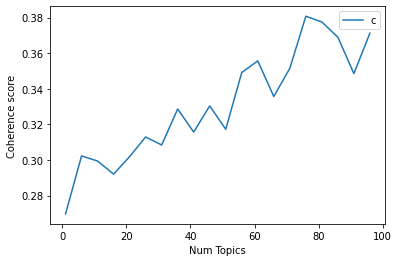

In [ ]:
limit=100; start=1; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### Obtaining the top 3 topics per document with their corresponding percentage weight

In [ ]:
topics_df1 = pd.DataFrame()
topics_df2 = pd.DataFrame()
topics_df3 = pd.DataFrame()

for i, row_list in enumerate(lda_model[corpus]):
  row = row_list[0] if lda_model.per_word_topics else row_list
  row = sorted(row, key=lambda x: (x[1]), reverse=True)
  for j, (topic_num, prop_topic) in enumerate(row):
    if len(row) >= 3:
      if j ==0:
        wp = lda_model.show_topic(topic_num)
        topic_keywords = ",".join([word for word, prop in wp])
        topics_df1 = topics_df1.append(pd.Series([int(topic_num), prop_topic, topic_keywords]), ignore_index=True)
      elif j ==1:
        wp = lda_model.show_topic(topic_num)
        topic_keywords = ",".join([word for word, prop in wp])
        topics_df2 = topics_df2.append(pd.Series([int(topic_num), prop_topic, topic_keywords]), ignore_index=True)
      elif j ==2:
        wp = lda_model.show_topic(topic_num)
        topic_keywords = ",".join([word for word, prop in wp])
        topics_df3 = topics_df3.append(pd.Series([int(topic_num), prop_topic, topic_keywords]), ignore_index=True)
      else:
        break
    elif len(row) == 2:
      if j ==0:
        wp = lda_model.show_topic(topic_num)
        topic_keywords = ",".join([word for word, prop in wp])
        topics_df1 = topics_df1.append(pd.Series([int(topic_num), prop_topic, topic_keywords]), ignore_index=True)
      elif j ==1:
        wp = lda_model.show_topic(topic_num)
        topic_keywords = ",".join([word for word, prop in wp])
        topics_df2 = topics_df2.append(pd.Series([int(topic_num), prop_topic, topic_keywords]), ignore_index=True)
        topics_df3 = topics_df3.append(pd.Series(['-', '-']), ignore_index=True)
    elif len(row) == 1:
      wp = lda_model.show_topic(topic_num)
      topic_keywords = ",".join([word for word, prop in wp])

topics_df1 = topics_df1.append(pd.Series([int(topic_num), prop_topic, topic_keywords]), ignore_index=True)
topics_df2 = topics_df2.append(pd.Series(['-', '-']), ignore_index=True)  
topics_df3 = topics_df3.append(pd.Series(['-', '-']), ignore_index=True)        
                
            
topics_df1.rename(columns={0:'1st Topic', 1:'1st Topic Contribution', 2:'1st Topic Keywords'}, inplace=True)
topics_df2.rename(columns={0:'2nd Topic', 1:'2nd Topic Contribution', 2:'2nd Topic Keywords'}, inplace=True)
topics_df3.rename(columns={0:'3rd Topic', 1:'3rd Topic Contribution', 2:'3rd Topic Keywords'}, inplace=True)

topics_comb = pd.concat([topics_df1, topics_df2, topics_df3],  axis=1, sort=False)
final = topics_comb.reset_index()
final.columns = ['Document No.', 'First Topic', 'First Topic Contribution', 'First Topic Keywords',
                 'Second Topic', 'Second Topic Contribution','Second Topic Keywords',
                 'Third Topic', 'Third Topic Contribution', 'Third Topic Keywords']

#Join topics dataframe to original data
#new_df = pd.concat([data_ready, topics_comb], axis=1, sort=False)

In [ ]:
final.head(20)

,Document No.,First Topic,First Topic Contribution,First Topic Keywords,Second Topic,Second Topic Contribution,Second Topic Keywords,Third Topic,Third Topic Contribution,Third Topic Keywords
0,0,1.0,0.727600,"use,model,result,base,study,method,datum,provi...",4.0,0.183292,"patient,treatment,group,clinical,case,study,fo...",3.0,0.050711,"study,health,risk,patient,use,high,among,age,c..."
1,1,4.0,0.479152,"patient,treatment,group,clinical,case,study,fo...",3.0,0.344098,"study,health,risk,patient,use,high,among,age,c...",1.0,0.119657,"use,model,result,base,study,method,datum,provi..."
2,2,3.0,0.583746,"study,health,risk,patient,use,high,among,age,c...",1.0,0.318027,"use,model,result,base,study,method,datum,provi...",0.0,0.094127,"specie,water,high,new,use,plant,surface,two,st..."
3,3,3.0,0.627081,"study,health,risk,patient,use,high,among,age,c...",4.0,0.272767,"patient,treatment,group,clinical,case,study,fo...",2.0,0.058678,"cell,protein,effect,gene,study,level,increase,..."
4,4,3.0,0.795915,"study,health,risk,patient,use,high,among,age,c...",1.0,0.196769,"use,model,result,base,study,method,datum,provi...",-,-,NaN
5,5,3.0,0.900594,"study,health,risk,patient,use,high,among,age,c...",1.0,0.092889,"use,model,result,base,study,method,datum,provi...",-,-,NaN
6,6,4.0,0.362834,"patient,treatment,group,clinical,case,study,fo...",1.0,0.332787,"use,model,result,base,study,method,datum,provi...",2,0.272752,"cell,protein,effect,gene,study,level,increase,..."
7,7,3.0,0.359023,"study,health,risk,patient,use,high,among,age,c...",2.0,0.322023,"cell,protein,effect,gene,study,level,increase,...",1,0.257493,"use,model,result,base,study,method,datum,provi..."
8,8,1.0,0.354261,"use,model,result,base,study,method,datum,provi...",4.0,0.291567,"patient,treatment,group,clinical,case,study,fo...",2,0.176252,"cell,protein,effect,gene,study,level,increase,..."
9,9,2.0,0.280703,"cell,protein,effect,gene,study,level,increase,...",1.0,0.272363,"use,model,result,base,study,method,datum,provi...",4,0.191148,"patient,treatment,group,clinical,case,study,fo..."


### Ways the model can be improved

*   Removal of punctuations in data
*   Removing very frequent words


*   Apply a Part-Of-Speech Tag filter
*   Tuning hyperparameters e.g alpha value.



